In [1]:
import numpy as np
import pandas as pd
import atoti as tt

pd.set_option('mode.chained_assignment', None)

Welcome to atoti 0.7.1!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, set the ATOTI_DISABLE_TELEMETRY environment variable to True.

You can hide this message by setting the ATOTI_HIDE_EULA_MESSAGE environment variable to True.


## A. Import dan Cleaning

In [2]:
assessments = pd.read_csv('assessments.csv')
courses = pd.read_csv('courses.csv')
studentAssessment = pd.read_csv('studentAssessment.csv')
studentInfo = pd.read_csv('studentInfo.csv')
studentRegistration = pd.read_csv('studentRegistration.csv')
studentVle =pd.read_csv('studentVle.csv',)
vle = pd.read_csv('vle.csv')

### * Mengubah kolom "id" menjadi tipe data string agar tidak dilakukan operasi SUM

**Tabel Vle**

In [3]:
# vle
vle['id_site'] = vle['id_site'].astype("string")
vle = vle.drop(['week_from','week_to'],axis=1)

In [4]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_site            6364 non-null   string
 1   code_module        6364 non-null   object
 2   code_presentation  6364 non-null   object
 3   activity_type      6364 non-null   object
dtypes: object(3), string(1)
memory usage: 199.0+ KB


**Tabel Student Vle**

In [5]:
# student vle
studentVle['id_site'] = studentVle['id_site'].astype("string")
studentVle['id_student'] = studentVle['id_student'].astype("string")

In [6]:
studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         string
 3   id_site            string
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(2), object(2), string(2)
memory usage: 487.8+ MB


**Tabel Student Info**

In [7]:
# student info
studentInfo['id_student'] = studentInfo['id_student'].astype("string")

In [8]:
studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  string
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(2), object(9), string(1)
memory usage: 3.0+ MB


**Tabel Assesments**

In [9]:
# assesments
assessments['id_assessment'] = assessments['id_assessment'].astype("string")

In [10]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    string 
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), object(3), string(1)
memory usage: 9.8+ KB


**Tabel Student Assesment**

In [11]:
# student Assesment
studentAssessment['id_student'] = studentAssessment['id_student'].astype("string")
studentAssessment['id_assessment'] = studentAssessment['id_assessment'].astype("string")

In [12]:
studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  string 
 1   id_student      173912 non-null  string 
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(2), string(2)
memory usage: 6.6 MB


### * Apakah Ada yang Null

tidak perlu semua kita akan fokus pada 3 tabel yaitu Student Info, Student Vle dan Vle### * Mengubah kolom "id" menjadi tipe data string agar tidak dilakukan operasi SUM

**Tabel Student Info**

In [13]:
studentInfo.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

IMD merupakan kumpulan data yang digunakan secara luas di Inggris untuk mengklasifikasikan kemiskinan. Pengklasifikasian ini berdasarkan tempat tinggal sehingga tidak bisa jika diisi rerata namun bisa di drop. Drop tidak dilakukan karena untuk melihat insight bukan sebagai data untuk training

**Tabel Student Vle dan Vle**

In [14]:
studentVle.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [15]:
vle.isnull().sum()

id_site              0
code_module          0
code_presentation    0
activity_type        0
dtype: int64

Tidak ditemukan null value

**Tabel Student Assesment**

In [16]:
studentAssessment.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

### * Membuat Klasifikasi untuk Roll Up

Klasifikasi Daerah Menjadi 4 bagian besar di UK yaitu England, Scotland, Ireland

In [17]:
studentInfo["region"].unique()

array(['East Anglian Region', 'Scotland', 'North Western Region',
       'South East Region', 'West Midlands Region', 'Wales',
       'North Region', 'South Region', 'Ireland', 'South West Region',
       'East Midlands Region', 'Yorkshire Region', 'London Region'],
      dtype=object)

In [18]:
studentInfo["country"] = np.nan
studentInfo["state"] = 'United Kingdom'
England = ['East Anglian Region', 'North Western Region', 'South East Region', 'West Midlands Region', 'North Region', 
           'South Region', 'South West Region', 'East Midlands Region', 'Yorkshire Region']

for item in England:
    studentInfo["country"] = studentInfo["country"][studentInfo["region"] == item] = 'England'
studentInfo["country"][studentInfo["region"] == 'Scotland'] = 'Scotland'
studentInfo["country"][studentInfo["region"] == 'Wales'] = 'Wales'
studentInfo["country"][studentInfo["region"] == 'Ireland'] = 'Ireland'

studentInfo.head(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,country,state
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,England,United Kingdom
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,Scotland,United Kingdom
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,England,United Kingdom
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,England,United Kingdom
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,England,United Kingdom


In [19]:
studentInfo["country"].unique()

array(['England', 'Scotland', 'Wales', 'Ireland'], dtype=object)

Klasifikasi imd_band tentang Income Deprivation and Employment Deprivation
<br>
Dapat diklasifikasikan menjadi tiga Most Deprived Least Deprived dan Just Ok

In [20]:
studentInfo["imd_band"].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%', nan,
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

In [21]:
studentInfo["deprivation"] = np.nan
studentInfo["deprivation"] = "Just Ok"
LeastDeprived = ['90-100%', '80-90%', '70-80%']
MostDeprived = ['0-10%', '10-20', '30-40%']

for item in MostDeprived :
    studentInfo["deprivation"][studentInfo["imd_band"] == item] = "Most Deprived"
    
for item in LeastDeprived :
    studentInfo["deprivation"][studentInfo["imd_band"] == item] = "Least Deprived"

studentInfo.head(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,country,state,deprivation
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,England,United Kingdom,Least Deprived
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,Scotland,United Kingdom,Just Ok
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,England,United Kingdom,Most Deprived
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,England,United Kingdom,Just Ok
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,England,United Kingdom,Just Ok


## B. Cube dan Insight

## Session 1 Hubungan StudentVle, StudentInfo dan Vle
#### Tujuan Untuk Melihat Cara Belajar (Modul Yang Dipelajari)

In [22]:
session = tt.Session()

In [23]:
studentVle_session = session.read_pandas(studentVle, table_name = "Studentvle")
studentVle_session.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546652,-10,8
4,AAA,2013J,30268,546614,-10,3


In [24]:
vle_session = session.read_pandas(vle, table_name = "Vle")
vle_session.head()

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546888,AAA,2013J,url
3,547035,AAA,2013J,resource
4,546897,AAA,2013J,url


In [25]:
studentInfo_session = session.read_pandas(studentInfo, table_name = "Studentinfo")
studentInfo_session.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,country,state,deprivation
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,England,United Kingdom,Least Deprived
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,Scotland,United Kingdom,Just Ok
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,England,United Kingdom,Most Deprived
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,England,United Kingdom,Just Ok
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,Wales,United Kingdom,Least Deprived


In [26]:
studentVle_cube = session.create_cube(studentVle_session)
studentInfo_cube = session.create_cube(studentInfo_session)

In [27]:
# Join Student Vle -> Vle, StudentInfo dan Student Assessment
studentVle_session.join(vle_session, mapping = {"id_site": "id_site"})
studentVle_session.join(studentInfo_session, mapping = {"id_student": "id_student"})

In [28]:
studentVle_hrc = studentVle_cube.hierarchies
studentVle_hrc

Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of Cube(_name='Studentvle', _hierarchies=..., _measures=Measures())>, _cube_name='Studentvle')

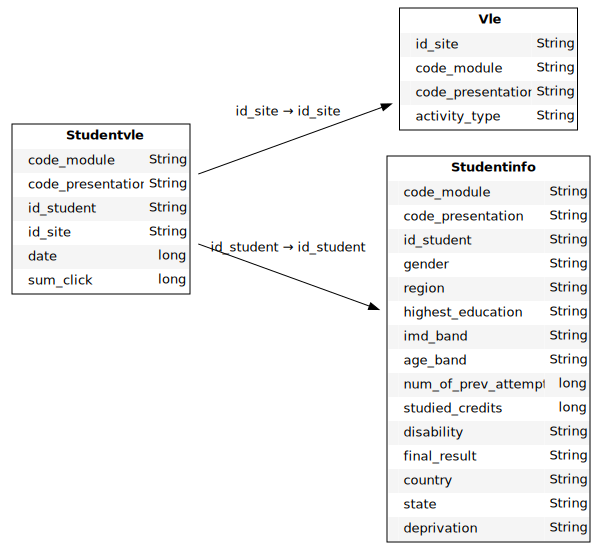

In [29]:
studentVle_cube.schema

### Slicing dan Dice

### Roll Up, Drill Down dan Insight

1. State -> Country -> Region

In [30]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

2. Deprivation -> Percent Deprivation

In [31]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

1. Aktivitas Yang Paling Diminati

In [32]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Dari Visualisasi Ini terlihat tren pembelajaran yang diminati oleh user dari berbagai daerah. Tren dilihat dari rerata klik <br>
Terlihat secara umum jenis aktivitas yang paling diminati adalah quiz disusul oleh outcontent, glossary dan ouwiki

In [33]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Disini terlihat bahwa ketika dilihat dari siswa perdaerah jenis aktivitas pembelajaran yang diminati masih sama <br>
Tren yang berbeda hanya terlihat pada bagian glosarry

In [34]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Disini terlihat bahwa ketika dilihat dari siswa dengan tingkat pendidikan tertentu jenis aktivitas pembelajaran yang diminati masih sama <br>
Tren yang berbeda juga hanya terlihat pada bagian glosarry

In [35]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [36]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

2. Apakah Jenis Aktivitas Mempengaruhi Final Result

In [37]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Terlihat bahwa siswa yang Distinction, Fail, Pass, Withdrawn memiliki kecenderungan yang sama dalam mengakses aktivitas

In [38]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [39]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Terlihat bahwa siswa yang Fail memiliki rerata klik yang rendah untuk akses golassary

In [40]:
session1 = tt.Session()

studentAssessment_session = session1.read_pandas(studentAssessment, table_name = "studentAssessment")
studentInfo_session = session1.read_pandas(studentInfo, table_name = "Studentinfo")
studentVle_session = session1.read_pandas(studentVle, table_name = "Studentvle")
assessments_session = session1.read_pandas(assessments, table_name = "Assessment")

studentAssessment_cube = session1.create_cube(studentAssessment_session)

studentAssessment_session.join(studentInfo_session, mapping = {"id_student": "id_student"})
studentAssessment_session.join(assessments_session, mapping = {"id_assessment": "id_assessment"})
studentAssessment_session.join(studentVle_session, mapping = {"id_student": "id_student"})

Deleting existing "Unnamed" session to create the new one.


In [41]:
studentAssessment_hrc = studentAssessment_cube.hierarchies
studentAssessment_hrc

Hierarchies(_create_hierarchy_from_arguments=<bound method Cube._create_hierarchy_from_arguments of Cube(_name='studentAssessment', _hierarchies=..., _measures=Measures())>, _cube_name='studentAssessment')

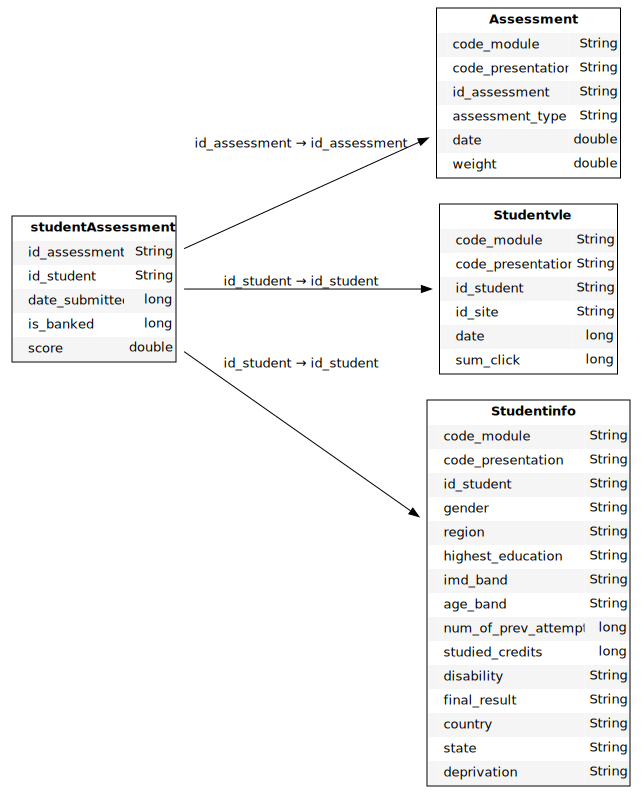

In [42]:
studentAssessment_cube.schema

### Slicing

### Roll Up, Drill Down dan Insight

Secara Umum Score dengan Final Result

In [43]:
session1.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Diatas adalah rerata nilai untuk kondisi final result. Nilai Semakin tinggi seiring dengan status result

1. Bagaimana Sebaran Score

In [44]:
session1.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [50]:
session1.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Representasi line chart memperlihatkan kecenderungan nilai memiliki rerata paling tinggi di negara Skotlandia

In [46]:
session1.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [46]:
session1.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Saat dijabarkan lagi ke dalam region yang lebih spesifik terlihat bahwa north region memiliki rerate tertinggi. Ini berarti sebaran nilai negara inggris cukup beragam karena rerata nilai negara Inggris cukup jauh jika dibanding dengan rerata salah satu regionnya yaitu north region

In [47]:
session1.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [51]:
session1.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Terlihat secara jelas tingkat pendidikan yang lebih tinggi memiliki rerata nilai yang lebih baik

In [52]:
session1.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [49]:
session1.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [53]:
session1.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Terlihat tingkat kesejahteraan yang lebih tinggi memiliki rerata nilai yang lebih baik